# Data Analysis - First Exploration

## Cargando dataset y preparación inicial

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe final de extracción, donde están todas las canciones, con duplicados (los hemos dejado
# por si utilizamos en algún momento la columna position)
data_ana = pd.read_csv("data_global.csv", sep = ',', parse_dates=['release_year'])
print('Tamaño inicial: ',data_ana.shape)

# Quitamos las columnas que no usaremos casi seguro y sobran
data_ana= data_ana.drop(columns=['Unnamed: 0', 'Position'])
print('Tamaño con columnas que nos interesan: ', data_ana.shape)

# Quitamos los duplicados por canciones, no nos sirven de momento para el análisis principal.
data_ana = data_ana.drop_duplicates(subset='spotify_id').copy()
print('Tamaño sin duplicados de canciones: ', data_ana.shape)

# Para analizar teniendo en cuenta los streams totales y que esté ponderado, calculamos los pesos de cada canción respecto a los streams totales
# Importante hacerlo una vez quitados los duplicados
# Versión optimizada corta y sin warnings

data_ana_2020 = data_ana.loc[data_ana['year'] == 2020]
data_ana_2019 = data_ana.loc[data_ana['year'] == 2019]
data_ana_2018 = data_ana.loc[data_ana['year'] == 2018]
data_ana_2017 = data_ana.loc[data_ana['year'] == 2017]

data_ana.loc[data_ana.year == 2020, 'streamstotal_weights'] = data_ana_2020['Streamstotal']/data_ana_2020['Streamstotal'].sum()
data_ana.loc[data_ana.year == 2019, 'streamstotal_weights'] = data_ana_2019['Streamstotal']/data_ana_2019['Streamstotal'].sum()
data_ana.loc[data_ana.year == 2018, 'streamstotal_weights'] = data_ana_2018['Streamstotal']/data_ana_2018['Streamstotal'].sum()
data_ana.loc[data_ana.year == 2017, 'streamstotal_weights'] = data_ana_2017['Streamstotal']/data_ana_2017['Streamstotal'].sum()

# COMPROBACIONES: Deberían sumar 1 los pesos de cada año
print('Peso 2020: ', data_ana.loc[data_ana['year'] == 2020, 'streamstotal_weights'].sum())
print('Peso 2019: ', data_ana.loc[data_ana['year'] == 2019, 'streamstotal_weights'].sum())
print('Peso 2018: ', data_ana.loc[data_ana['year'] == 2018, 'streamstotal_weights'].sum())
print('Peso 2017: ', data_ana.loc[data_ana['year'] == 2017, 'streamstotal_weights'].sum())

#Ver cómo sale
data_ana[data_ana['Track Name'] == 'Punto G']

# Exportamos un archivo CSV el resultado para tenerlo ya listo en próximos análisis
data_ana.to_csv("data_global_final.csv", sep = ',')

#Revisamos los tipos de datos:
data_ana.info()

Tamaño inicial:  (48066, 38)
Tamaño con columnas que nos interesan:  (48066, 36)
Tamaño sin duplicados de canciones:  (1581, 36)
Peso 2020:  1.0
Peso 2019:  0.9999999999999999
Peso 2018:  1.0
Peso 2017:  1.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581 entries, 0 to 48064
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Track Name            1581 non-null   object        
 1   Artist                1581 non-null   object        
 2   Streams               1581 non-null   int64         
 3   date                  1581 non-null   object        
 4   spotify_id            1581 non-null   object        
 5   year                  1581 non-null   int64         
 6   Streamstotal          1581 non-null   int64         
 7   album                 1581 non-null   object        
 8   release_date          1581 non-null   object        
 9   length                1581 non-null   flo

/Users/victormac/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## First exploration

En el siguiente gráfico vemos que en el aumento de streamstotales en progresivo en años, esto puede significar que se usaba menos Spotify en años anteriores, o que según pasan los años se escuchan más veces las canciones del top200, en vez de otras. Como la idea es que en nuestros análisis se usen datos ponderados respecto al año, esperamos que no afecten.

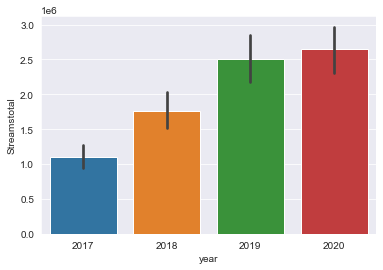

In [165]:
data_ana.groupby(['year']).sum()
sns.barplot(x="year", y="Streamstotal", data=data_ana)

Si hacemos un conteo del número de canciones únicas por año. De primeras es curioso que el 2019 tenga menos canciones únicas en el top200.

In [166]:
data_ana.groupby(['year']).count()

,Track Name,Artist,Streams,date,spotify_id,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,380,352,276,224,180,92,38,21,7,4,380,384,384,384,384
2018,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,399,368,311,206,127,51,23,9,5,3,399,401,401,401,401
2019,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,328,259,157,102,48,31,6,1,0,372,372,372,372,372
2020,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,417,348,269,110,63,24,8,2,0,0,417,424,424,424,424


Ojo, puede ocurrir que una misma canción de un artista se repita, porque está en el top200 dos años diferentes y albunes diferentes (por ejemplo, si se ha hecho un recopilatorio otro año). He decidido ignorarlo porque va a afectar poco en los análisis

In [167]:
data_ana[data_ana['Artist'] == 'KAROL G']

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
0,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982,Tusa,2019-11-07,0.324972,0.91,0.29500,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.017033
61,Follow,KAROL G,152745,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,6900319,Follow,2020-04-01,0.330442,0.78,0.66700,0.735,0.787,0.000006,0.0721,0.875476,0.198031,0.455,0.711901,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.006159
102,Créeme,KAROL G,75552,2019-03-13,1mT47pKLXUwPYGwB91GcNz,2019,3272814,Créeme,2018-11-02,0.354546,0.72,0.15400,0.715,0.872,0.000146,0.1100,0.904169,0.045599,0.682,0.230459,4,2018-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.003510
153,Culpables,KAROL G,56202,2019-03-13,6q8Lb50EtqNeeJXXe8mMAH,2019,2136436,Culpables,2018-09-14,0.390787,0.69,0.27900,0.728,0.801,0.000005,0.1430,0.922521,0.065287,0.416,0.451744,4,2018-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.002291
204,Punto G,KAROL G,51826,2019-04-05,5Lb1pjnll07UQKxNpnnGBy,2019,1930173,Punto G,2019-04-05,0.275291,0.62,0.00796,0.787,0.751,0.000139,0.0857,0.863559,0.091633,0.926,0.691617,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.002070
232,Punto G,KAROL G,122406,2019-05-03,2E82gORVSA7UMEz5M1IP3b,2019,1151711,OCEAN,2019-05-03,0.279327,0.62,0.00938,0.791,0.746,0.000117,0.1250,0.864281,0.097713,0.905,0.691837,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.001235
242,Créeme,KAROL G,64151,2019-05-03,4EKZsrsCKyqr64FBHLc0DU,2019,600475,OCEAN,2019-05-03,0.359162,0.67,0.12600,0.715,0.874,0.000162,0.1050,0.901707,0.045744,0.652,0.230833,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.000644
252,Love With A Quality,KAROL G,46140,2019-05-03,6F9DPkjP6Tbz9FLgLyYgX6,2019,46140,OCEAN,2019-05-03,0.383438,0.61,0.06460,0.849,0.752,0.000003,0.1060,0.895798,0.177765,0.586,0.257712,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.000049
253,Culpables,KAROL G,41255,2019-05-03,4RGKft6YTTWHjpQeRIInuS,2019,362564,OCEAN,2019-05-03,0.396773,0.61,0.28700,0.728,0.812,0.000003,0.1300,0.920059,0.087001,0.418,0.451544,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.000389
263,Ocean,KAROL G,31994,2019-05-03,6qoIFQfdmaQF9A1gb67tR7,2019,541126,OCEAN,2019-05-03,0.209542,0.74,0.93300,0.727,0.482,0.000000,0.3880,0.815791,0.132889,0.487,0.083410,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11463195,0.878788,0.000580


# Pregunta 1: ¿Ha cambiado la cantidad de música que se escucha en spotify?

Se puede confirmar que sí, pero cuidado, porque puede ocurrir que spotify lo escuchaba menos gente o que la gente escuchaba más variedad (hay que acordarse que los datos son del top200, toda la música que no esté en el top200 se queda fuera)

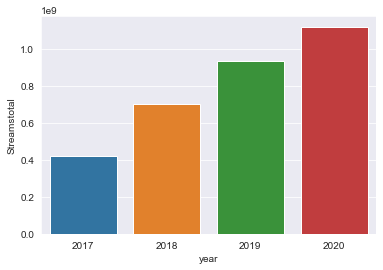

In [168]:
data_ana_streams = data_ana.loc[:, ['year', 'Streamstotal']]
data_year_streams = data_ana_streams.groupby(['year']).sum()
data_year_streams.reset_index(inplace=True)
data_year_streams

sns.barplot(x="year", y="Streamstotal", data=data_year_streams)

# Pregunta 2: ¿Han cambiado las features entre diferentes años?

Llamamos Features a las características de cada canción y que nos dan información de ella. En la web de Spotify explica qué significa cada feature: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Lo primero es ver una aproximación de las medias sin ponderar de las features, a ver si tienen sentido. Parece que sí, y todas están entre 0 y 1 como hicimos anteriormente.

In [169]:
data_ana.groupby(['year']).mean()


,Streams,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
year,,,,,,,,,,,,,,,,,
2017,32552.799479,1.102343e+06,0.372746,0.380911,0.206352,0.686312,0.700550,0.006757,0.171757,0.831946,0.099106,0.584369,0.377991,3.989583,1.219991e+07,0.805371,0.002604
2018,42820.713217,1.755079e+06,0.346084,0.382843,0.225762,0.693599,0.680849,0.005902,0.163658,0.834129,0.114026,0.542164,0.397529,3.980050,9.191848e+06,0.797728,0.002494
2019,62737.709677,2.506742e+06,0.355486,0.578011,0.268883,0.706296,0.665688,0.014216,0.169047,0.828403,0.145917,0.569583,0.412505,3.981183,9.084494e+06,0.803329,0.002688
2020,83626.903302,2.642391e+06,0.334065,0.719222,0.244131,0.715672,0.674737,0.007978,0.156612,0.836419,0.142219,0.592751,0.408719,3.976415,7.231718e+06,0.807128,0.002358


Ploteamos algunas medias de una feature concreta (sin ponderar) para ver qué se ve, y podemos ver algunas tendencias, eso sí, ligeras

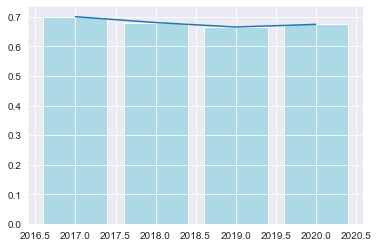

Text(0.5, 1.0, 'Acousticness')

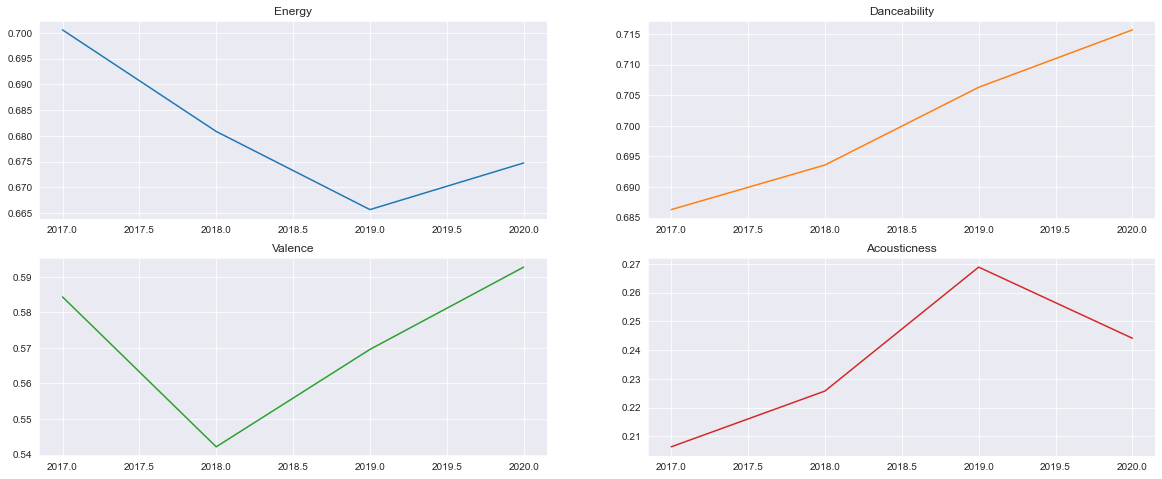

In [171]:
data_features_means_nopon = data_ana.groupby(['year']).mean()
data_features_means_nopon.reset_index(inplace=True)

x_years = data_features_means_nopon["year"]

fig, ax = plt.subplots()
ax.bar(x_years,data_features_means_nopon["energy"], color="lightblue", zorder=0)
# sns.regplot(x=x, y=y, ax=ax)
ax.plot(x_years, data_features_means_nopon["energy"])
ax.set_ylim(0, None)
plt.show()

'''fig, axs = plt.subplots(3)
fig.suptitle('Comparative')
axs[0].plot(data_year_means["year"], data_year_means["energy"])
axs[1].plot(data_year_means["year"], data_year_means["danceability"])
axs[2].plot(data_year_means["year"], data_year_means["valence"])'''

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 8)
axs[0, 0].plot(x_years, data_features_means_nopon["energy"])
axs[0, 0].set_title('Energy')
axs[0, 1].plot(x_years, data_features_means_nopon["danceability"], 'tab:orange')
axs[0, 1].set_title('Danceability')
axs[1, 0].plot(x_years, data_features_means_nopon["valence"], 'tab:green')
axs[1, 0].set_title('Valence')
axs[1, 1].plot(x_years, data_features_means_nopon["acousticness"], 'tab:red')
axs[1, 1].set_title('Acousticness')

Pero antes de analizar nada vamos a ponderar los datos a ver si hay diferencia. Para ello hemos hecho una función para calcular las medias ponderadas de cada feature por años, para poner en gráficos fácilmente después

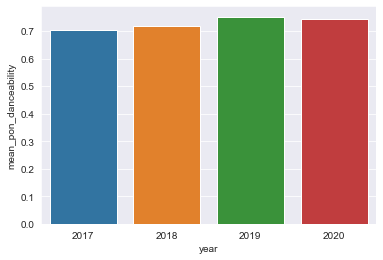

In [172]:
 def mediapon_features (feature):
    data_dance_compar = data_ana.loc[:, ['year', feature, 'streamstotal_weights']]
    data_dance_compar["mean_pon_" + feature] = data_dance_compar[feature] * data_dance_compar['streamstotal_weights']
    media_dance_compar = data_dance_compar.groupby(['year']).sum()
    media_dance_compar.reset_index(inplace=True)
    media_dance_compar = media_dance_compar.drop(columns=[feature])
    return media_dance_compar

# Prueba con danceability
media_dance_pon = mediapon_features ('danceability')
sns.barplot(x="year", y="mean_pon_danceability", data=media_dance_pon)

Hacemos la comparación a ver si hay diferencias. Hay una diferencia sutil, pero que en algunos casos puede variar la tendencia, por lo que haremos la ponderación de todas las features.

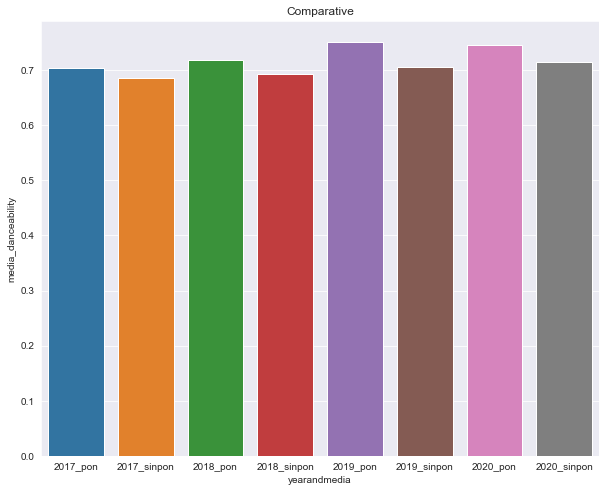

In [100]:
# Comparar medias sin y con ponderación
comparar_pon_ysinpon = pd.merge(data_year_means, media_dance_pon, how='right', on="year")
comparar_pon_ysinpon = comparar_pon_ysinpon[['year', 'danceability', 'mean_pon_danceability']]

#Hago un melt de la tabla porque quiero comparar
comparar_pon_ysinpon2 = pd.melt(comparar_pon_ysinpon,
        id_vars = ['year'],
       value_vars = ['danceability', "mean_pon_danceability"],
       value_name = 'media_danceability')

list_x = ['2017_sinpon', '2018_sinpon', '2019_sinpon', '2020_sinpon', '2017_pon', '2018_pon', '2019_pon', '2020_pon']
comparar_pon_ysinpon2['yearandmedia'] = list_x
comparar_pon_ysinpon2 =  comparar_pon_ysinpon2.drop(columns=['variable', 'year'])
comparar_pon_ysinpon2 = comparar_pon_ysinpon2.sort_values('yearandmedia')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparative')
sns.barplot(x="yearandmedia", y ='media_danceability', data=comparar_pon_ysinpon2)


Ahora vamos a plotear todas las features para ver su tendencia con la ponderación hecha, pero aprovecharmos y añadimos los datos sin ponderar para compararlo.

**Features:**
'length'
'popularity'
'acousticness'
'danceability'
'energy'
'instrumentalness'
'liveness'
'loudness'
'speechiness'
'valence'
'tempo'

In [267]:
features = ['length',
            'popularity',
            'acousticness',
            'danceability',
            'energy',
            'instrumentalness',
            'liveness',
            'loudness',
            'speechiness',
            'valence',
            'tempo']

# Creo un diccionario para meter todos los dataframes
dic_features_means = {}
for x in features:
    dic_features_means[x] = mediapon_features (x)
    
    
media_length = dic_features_means['length']['mean_pon_length']
media_popularity = dic_features_means['popularity']['mean_pon_popularity']
media_acousticness = dic_features_means['acousticness']['mean_pon_acousticness']
media_danceability = dic_features_means['danceability']['mean_pon_danceability']
media_energy = dic_features_means['energy']['mean_pon_energy']
media_instrumentalness = dic_features_means['instrumentalness']['mean_pon_instrumentalness']
media_liveness = dic_features_means['liveness']['mean_pon_liveness']
media_loudness = dic_features_means['loudness']['mean_pon_loudness']
media_speechiness = dic_features_means['speechiness']['mean_pon_speechiness']
media_valence = dic_features_means['valence']['mean_pon_valence']
media_tempo = dic_features_means['tempo']['mean_pon_tempo']

Ploteamos todos los gráficos para ver la tendencia

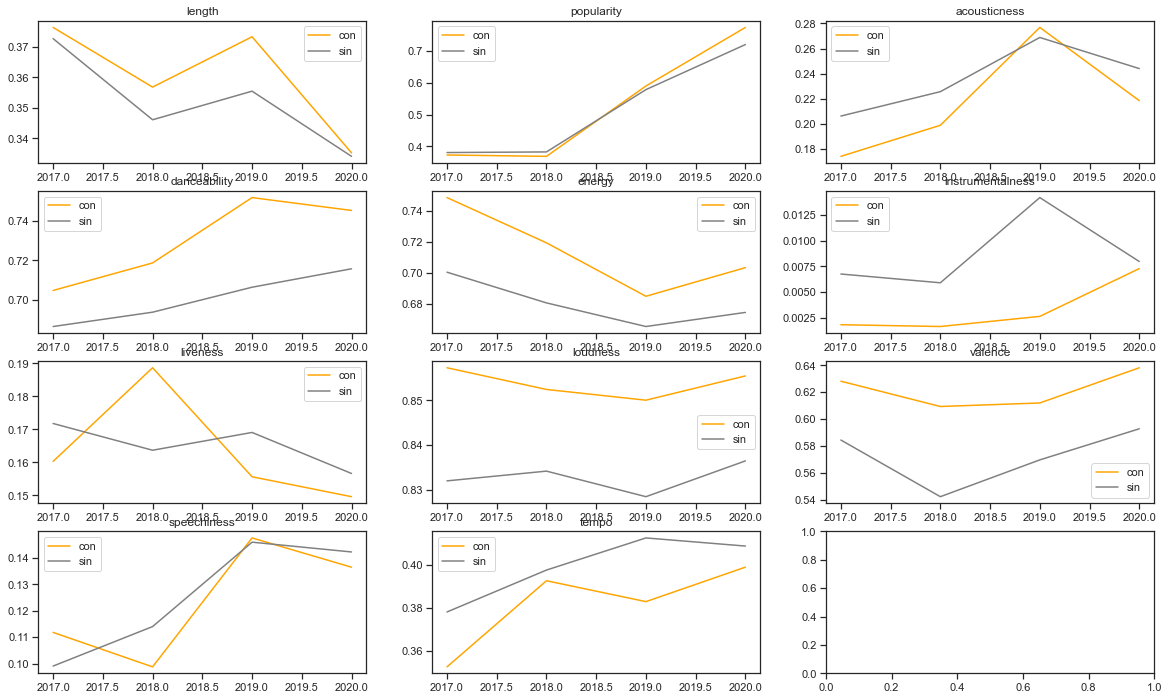

In [268]:
x_years = dic_features_means['length']['year']

data_year_means= data_ana.groupby(['year']).mean()
data_year_means.reset_index(inplace=True)

fig, axs = plt.subplots(4, 3)
fig.set_size_inches(20, 12)

graph_1 = axs[0, 0]
graph_1.plot(x_years, media_length,label='con', color = 'orange') # con ponderación
graph_1.plot(x_years, data_year_means['length'],label='sin', color = 'grey') # sin ponderación
graph_1.set_title('length')
graph_1.legend()

graph_2 = axs[0, 1]
graph_2.plot(x_years, media_popularity,label='con', color = 'orange') # con ponderación
graph_2.plot(x_years, data_year_means['popularity'],label='sin', color = 'grey') # sin ponderación
graph_2.set_title('popularity')
graph_2.legend()

graph_3 = axs[0, 2]
graph_3.plot(x_years, media_acousticness,label='con', color = 'orange') # con ponderación
graph_3.plot(x_years, data_year_means['acousticness'],label='sin', color = 'grey') # sin ponderación
graph_3.set_title('acousticness')
graph_3.legend()

graph_4 = axs[1, 0]
graph_4.plot(x_years, media_danceability,label='con', color = 'orange') # con ponderación
graph_4.plot(x_years, data_year_means['danceability'],label='sin', color = 'grey') # sin ponderación
graph_4.set_title('danceability')
graph_4.legend()

graph_5 = axs[1, 1]
graph_5.plot(x_years, media_energy,label='con', color = 'orange') # con ponderación
graph_5.plot(x_years, data_year_means['energy'],label='sin', color = 'grey') # sin ponderación
graph_5.set_title('energy')
graph_5.legend()

graph_6 = axs[1, 2]
graph_6.plot(x_years, media_instrumentalness,label='con', color = 'orange') # con ponderación
graph_6.plot(x_years, data_year_means['instrumentalness'],label='sin', color = 'grey') # sin ponderación
graph_6.set_title('instrumentalness')
graph_6.legend()

graph_7 = axs[2, 0]
graph_7.plot(x_evo, media_liveness,label='con', color = 'orange') # con ponderación
graph_7.plot(x_evo, data_year_means['liveness'],label='sin', color = 'grey') # sin ponderación
graph_7.set_title('liveness')
graph_7.legend()

graph_8 = axs[2, 1]
graph_8.plot(x_years, media_loudness,label='con', color = 'orange') # con ponderación
graph_8.plot(x_years, data_year_means['loudness'],label='sin', color = 'grey') # sin ponderación
graph_8.set_title('loudness')
graph_8.legend()

graph_9 = axs[2, 2]
graph_9.plot(x_years, media_valence,label='con', color = 'orange') # con ponderación
graph_9.plot(x_years, data_year_means['valence'],label='sin', color = 'grey') # sin ponderación
graph_9.set_title('valence')
graph_9.legend()

graph_10 = axs[3, 0]
graph_10.plot(x_years, media_speechiness,label='con', color = 'orange') # con ponderación
graph_10.plot(x_years, data_year_means['speechiness'],label='sin', color = 'grey') # sin ponderación
graph_10.set_title('speechiness')
graph_10.legend()

graph_11 = axs[3, 1]
graph_11.plot(x_years, media_tempo,label='con', color = 'orange') # con ponderación
graph_11.plot(x_years, data_year_means['tempo'],label='sin', color = 'grey') # sin ponderación
graph_11.set_title('tempo')
graph_11.legend()


# Análisis feature por feature

### >>> Length


- **Feature**: Mide la longitud de las canciones
- **Tendencia**: Se ve que que la tendencia es que la longitud de las canciones más escuchadas sean cada vez más cortas.
- **Antes y después**: Se ve que las canciones más escuchadas durante la pandemia son más cortas.
- **Preguntas**: 


In [272]:
media_length

,year,streamstotal_weights,mean_pon_popularity
0,2017,1.0,0.373213
1,2018,1.0,0.369006
2,2019,1.0,0.589359
3,2020,1.0,0.772854


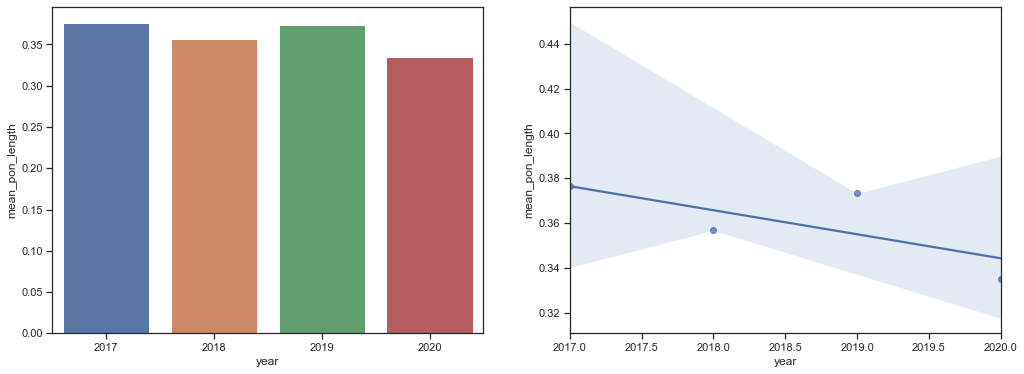

In [269]:
media_length = mediapon_features ('length')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_length", data=media_length, ax=axs[0])
sns.regplot(x="year", y="mean_pon_length", data=media_length, ax=axs[1])

### >>> Popularity

- **Feature**: Mide la popularidad de la canción, según unos álculos de Spotify
- **Tendencia**: Se ve que que la tendencia es que se escuchen canciones que son más populares, pero es lógico si están dentro del top200, así que no nos aporta nada.

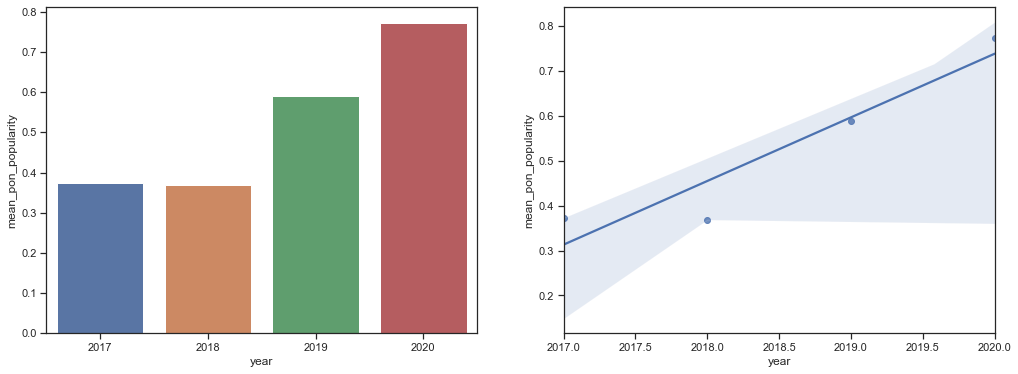

In [273]:
media_popularity = mediapon_features ('popularity')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_popularity", data=media_popularity, ax=axs[0])
sns.regplot(x="year", y="mean_pon_popularity", data=media_popularity, ax=axs[1])

### >>> acousticness

- **Feature**: ¿Cuánto de acústica es una canción?
- **Tendencia**: 
- **Antes y después**: Parece que hubo una vuelta atrás, donde se escuchan más canciones acústicas en la pandemia que en años anteriores.
- **Preguntas**: 

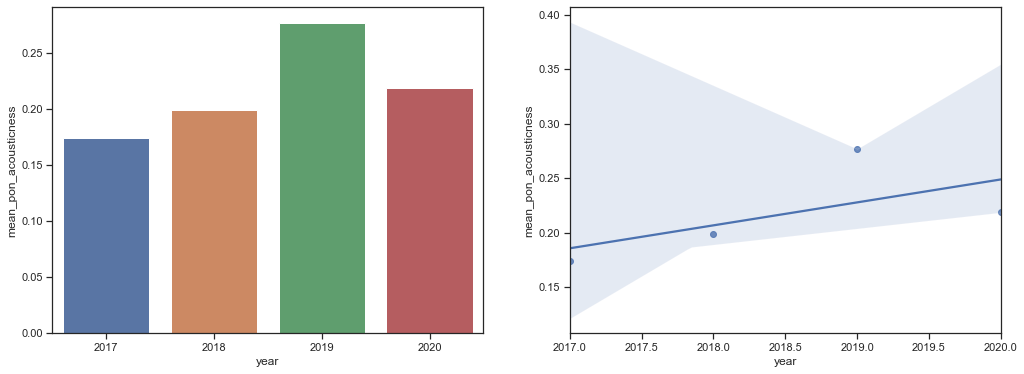

In [274]:
media_acousticness = mediapon_features ('acousticness')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_acousticness", data=media_acousticness, ax=axs[0])
sns.regplot(x="year", y="mean_pon_acousticness", data=media_acousticness, ax=axs[1])

### >>> danceability

- **Feature**: ¿Cuánto de bailable es la canción?
- **Tendencia**: 
- **Antes y después**: Parece que hubo una vuelta atrás, donde se escuchan más canciones acústicas en la pandemia que en años anteriores.
- **Preguntas**: 

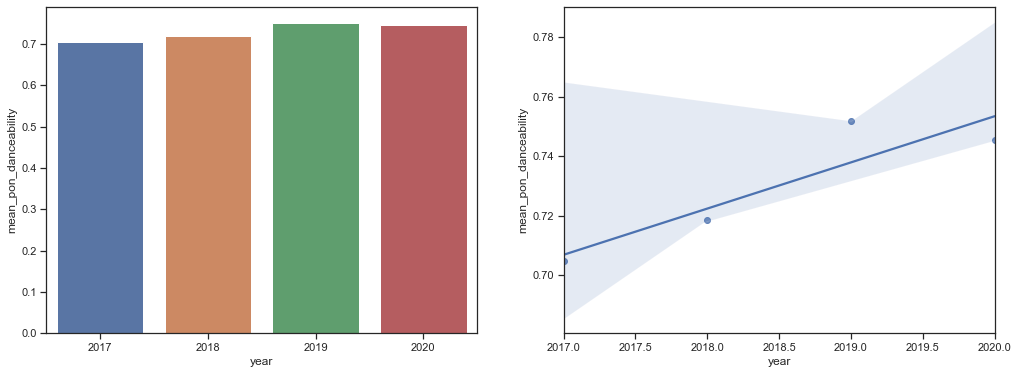

In [275]:
media_danceability = mediapon_features ('danceability')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_danceability", data=media_danceability, ax=axs[0])
sns.regplot(x="year", y="mean_pon_danceability", data=media_danceability, ax=axs[1])

### >>> energy

- **Feature**: Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
- **Tendencia**: 
- **Antes y después**: Parece que hubo una vuelta atrás, donde se escuchan más canciones acústicas en la pandemia que en años anteriores.
- **Preguntas**: 

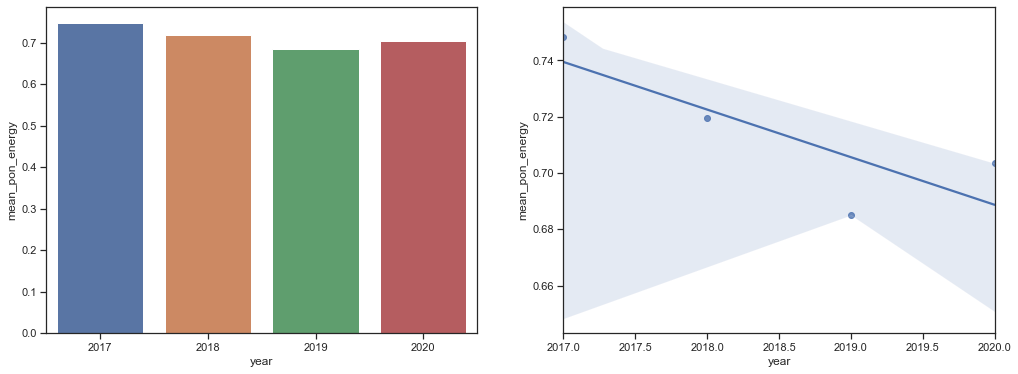

In [276]:
media_energy = mediapon_features ('energy')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_energy", data=media_energy, ax=axs[0])
sns.regplot(x="year", y="mean_pon_energy", data=media_energy, ax=axs[1])

### >>> Instrumentalness

- **Feature**: 
- **Tendencia**: 
- **Antes y después**: 
- **Preguntas**: 

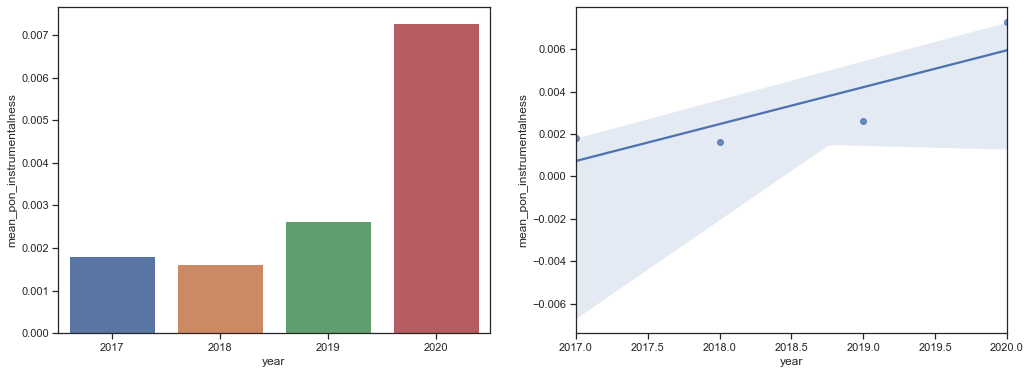

In [277]:
media_instrumentalness = mediapon_features ('instrumentalness')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_instrumentalness", data=media_instrumentalness, ax=axs[0])
sns.regplot(x="year", y="mean_pon_instrumentalness", data=media_instrumentalness, ax=axs[1])


### >>> liveness

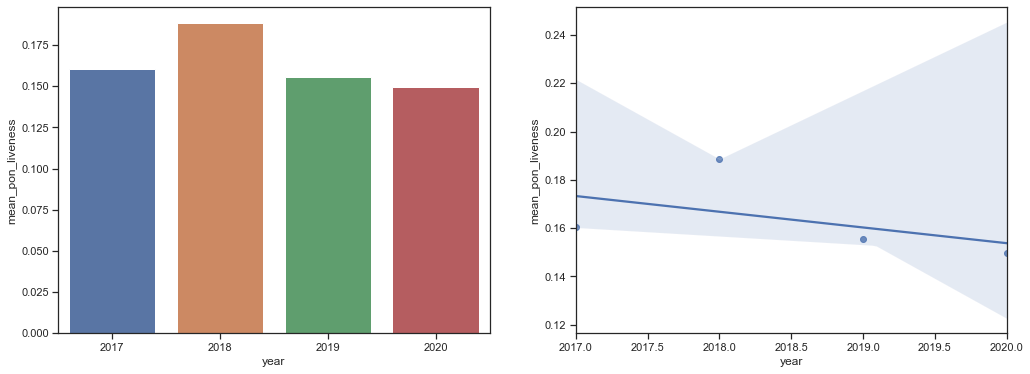

In [278]:
media_liveness = mediapon_features ('liveness')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_liveness", data=media_liveness, ax=axs[0])
sns.regplot(x="year", y="mean_pon_liveness", data=media_liveness, ax=axs[1])

### >>> loudness

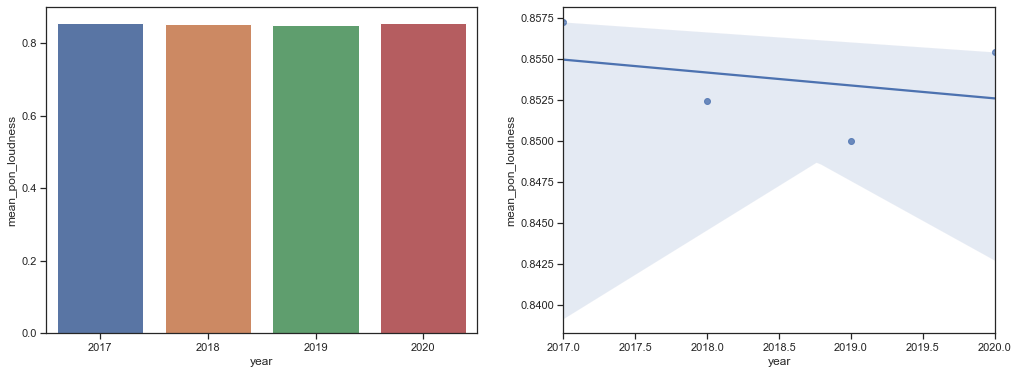

In [280]:
media_loudness = mediapon_features ('loudness')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_loudness", data=media_loudness, ax=axs[0])
sns.regplot(x="year", y="mean_pon_loudness", data=media_loudness, ax=axs[1])

### >>> speechiness

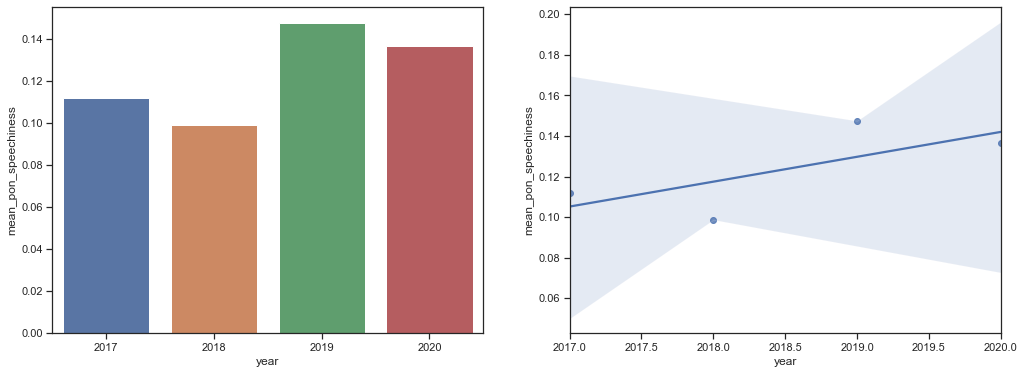

In [281]:
media_speechiness = mediapon_features ('speechiness')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_speechiness", data=media_speechiness, ax=axs[0])
sns.regplot(x="year", y="mean_pon_speechiness", data=media_speechiness, ax=axs[1])

### >>> valence

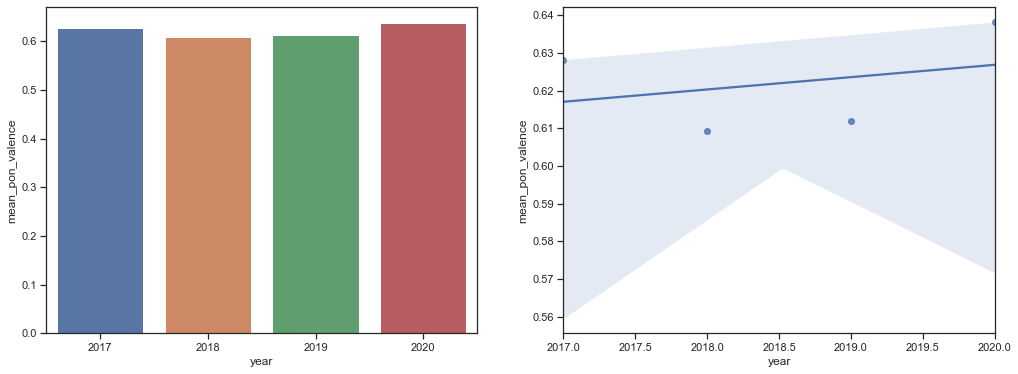

In [279]:
media_valence = mediapon_features ('valence')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_valence", data=media_valence, ax=axs[0])
sns.regplot(x="year", y="mean_pon_valence", data=media_valence, ax=axs[1])


### >>> tempo

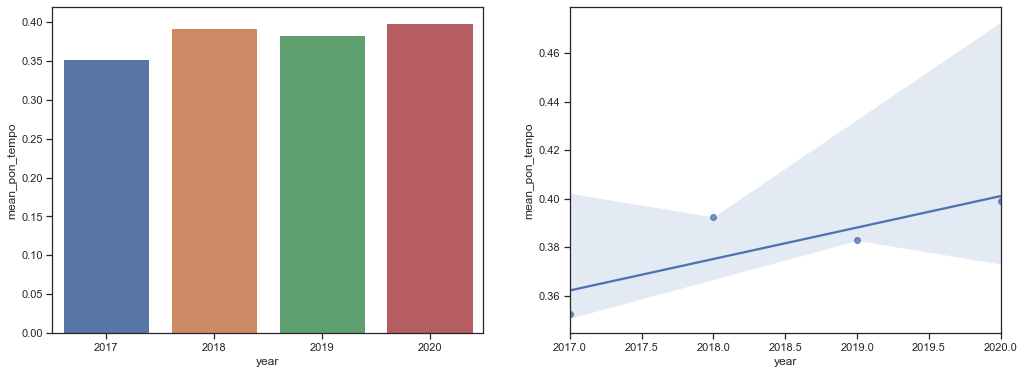

In [283]:
media_tempo = mediapon_features ('tempo')
fig, axs = plt.subplots(ncols=2)
fig.set_figheight(6)
fig.set_figwidth(17)
sns.barplot(x="year", y="mean_pon_tempo", data=media_tempo, ax=axs[0])
sns.regplot(x="year", y="mean_pon_tempo", data=media_tempo, ax=axs[1])

